# Develop a classification model using Decision Tree Algorithm

In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [2]:
!wget -nc -O drug200.csv "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"


File ‘drug200.csv’ already there; not retrieving.


In [3]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
my_data.shape

(200, 6)

### Pre-processing
- X as the Feature Matrix (data of my_data)
- y as the response vector (target)

In [5]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [6]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values  # to prevent error after running this cell after encoding(first run) i declare X here again

# encode gender
le_sex = LabelEncoder()
le_sex.fit(('F', 'M'))
X[:, 1] = le_sex.transform(X[:, 1])

# encode blood pressure
le_bp = LabelEncoder()
le_bp.fit(('LOW', 'NORMAL', 'HIGH'))
X[:, 2] = le_bp.transform(X[:, 2])

# encode cholesterol
le_chol = LabelEncoder()
le_chol.fit(('HIGH', 'NORMAL'))
X[:, 3] = le_chol.transform(X[:, 3])


X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [7]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=4)
print(f'X_train= {X_train.shape} |  y_train= {y_train.shape}')
print(f'X_test= {X_test.shape} | y_test= {y_test.shape}')

X_train= (140, 5) |  y_train= (140,)
X_test= (60, 5) | y_test= (60,)


## initial the model

In [9]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
predTree = drugTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

['drugY' 'drugY' 'drugY' 'drugY' 'drugC']
11     drugY
99     drugY
128    drugY
175    drugY
1      drugC
Name: Drug, dtype: object


In [12]:
accuracy_score(y_test, predTree)

0.9666666666666667

### the accuracy is actually pretty good here !!



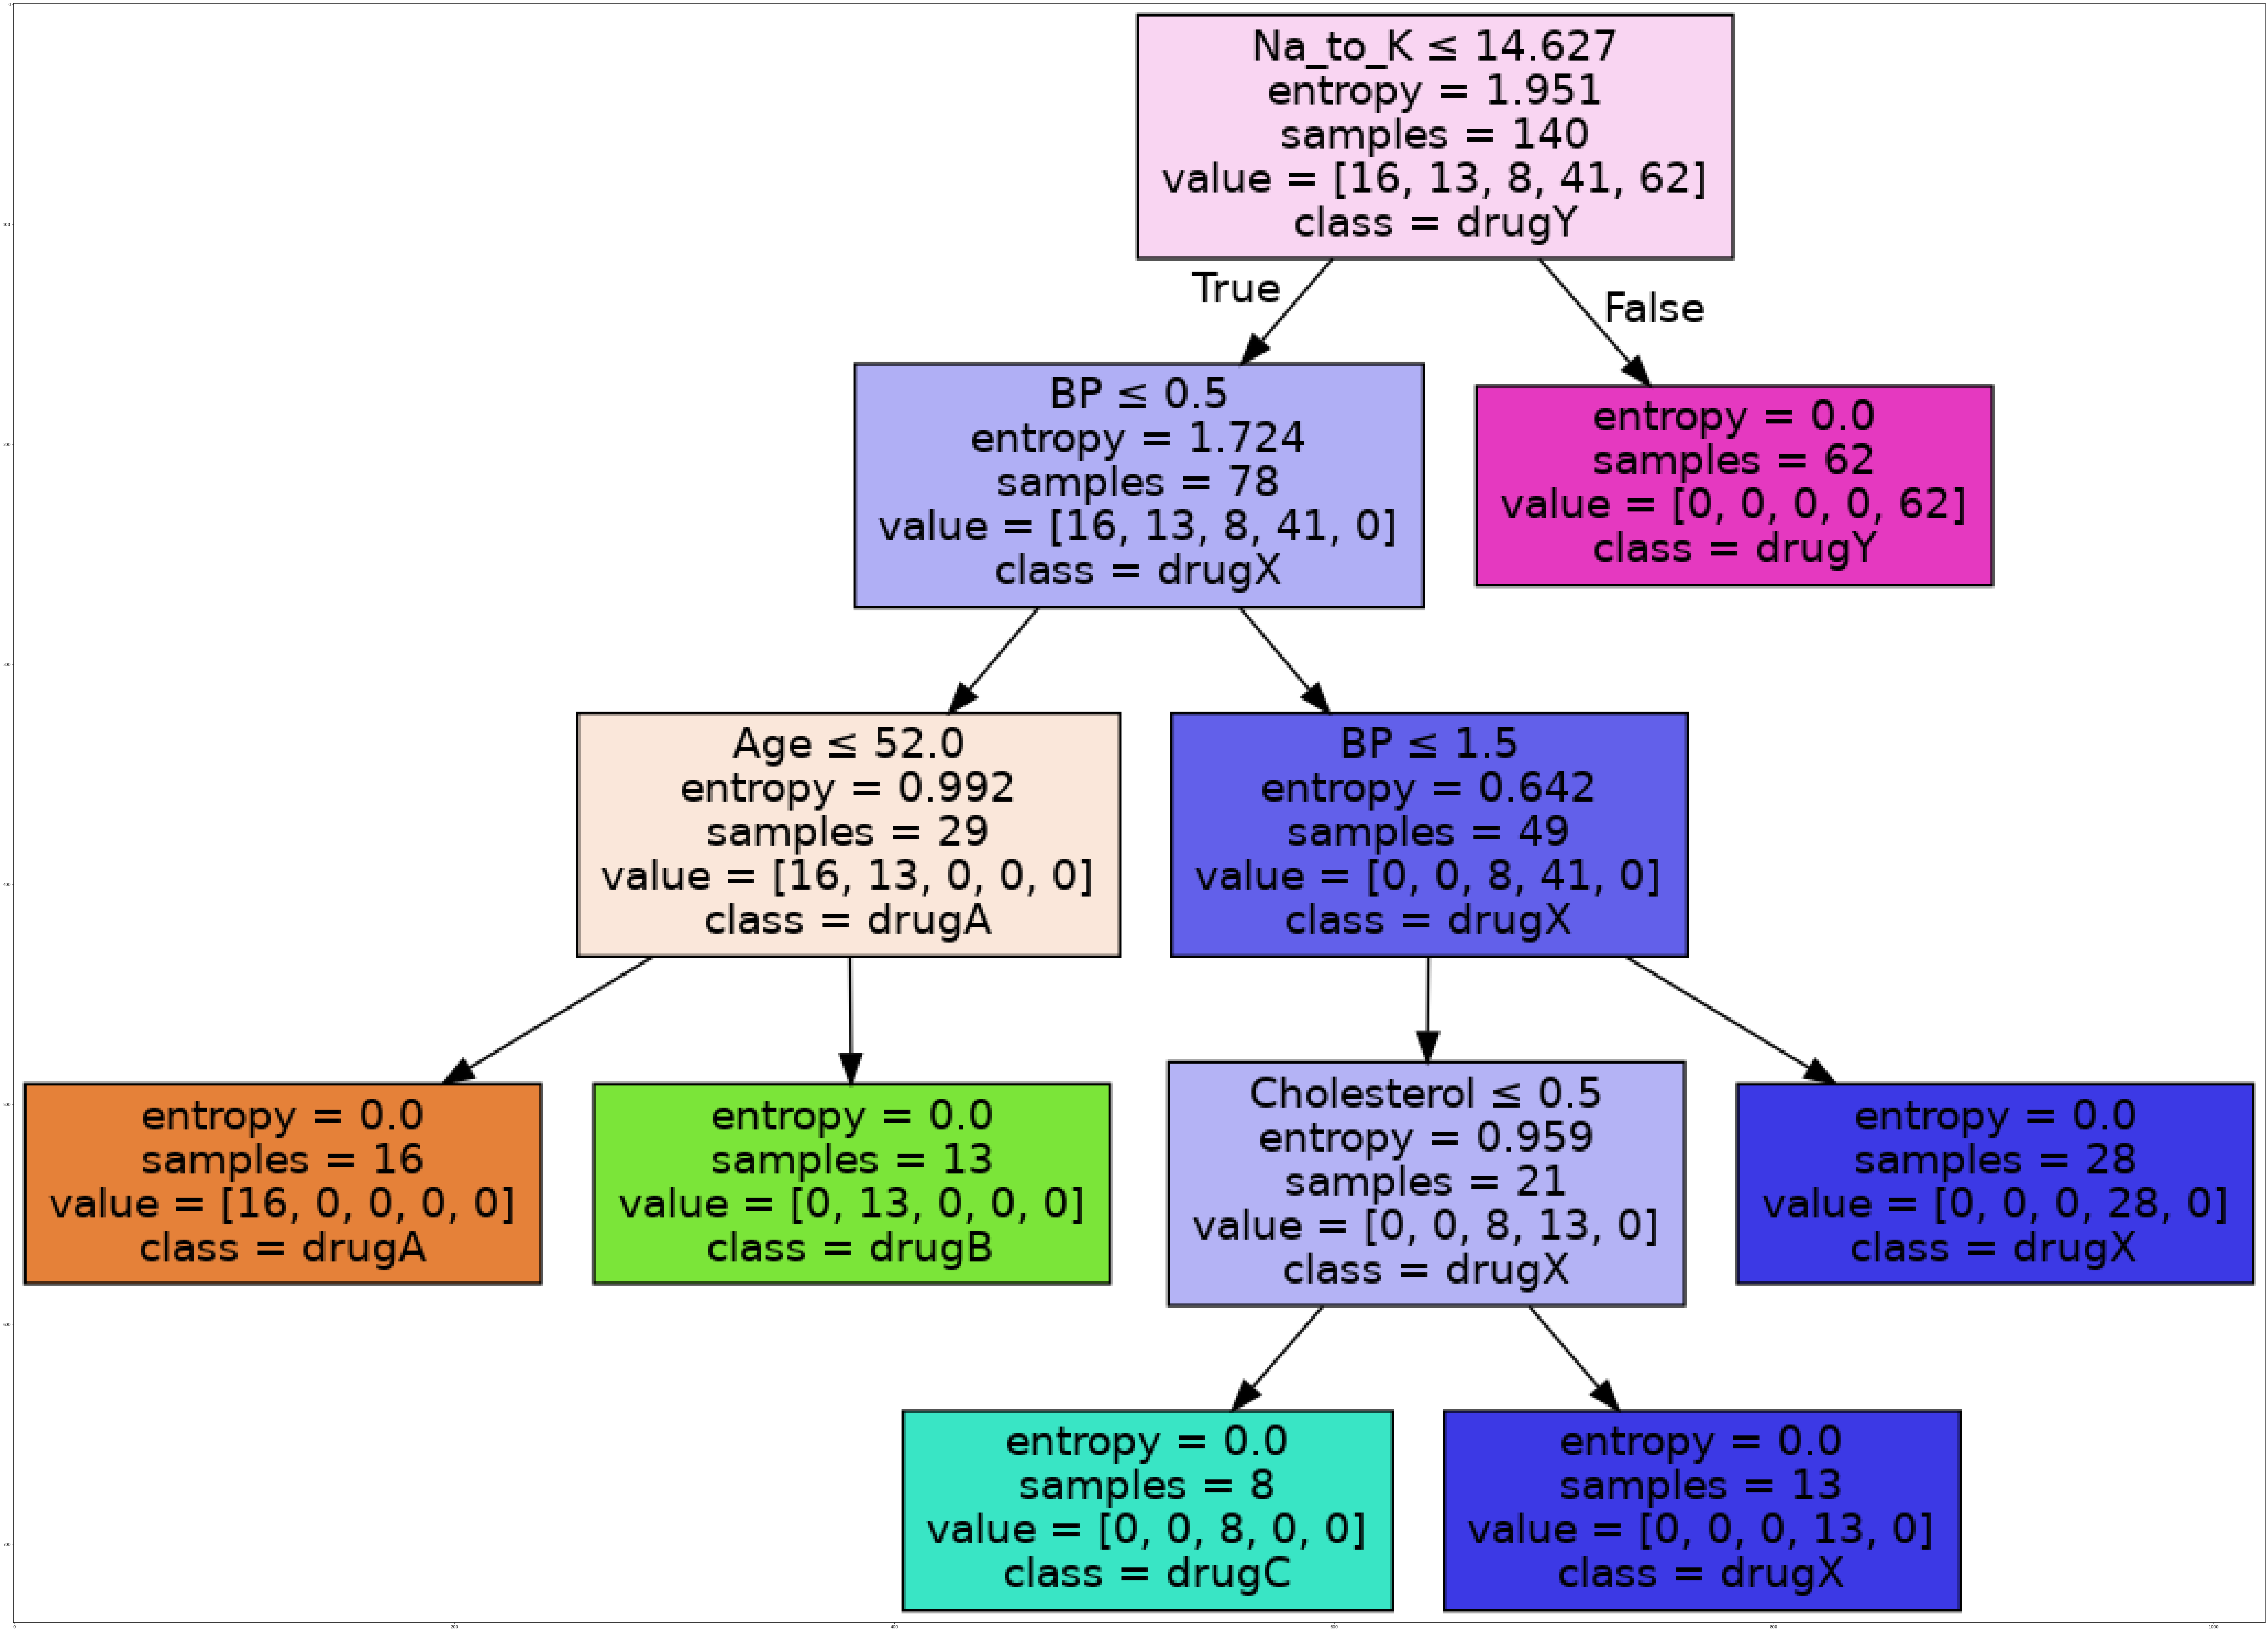

In [13]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt


dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')